In [29]:
import torch

In [30]:
torch.cuda.is_available()

True

In [31]:
data = {
        # "SquuezeViT_3_NIH_EXP_1":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp1/epoch_100.pth"),
        # "DenseNet_121_Pretrained":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp2/epoch_100.pth"),
        # "DenseNet_121_init":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp3/epoch_100.pth"),
        # "DenseNet_2":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp4/epoch_100.pth"),
        # "Test Exp 1":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp1/epoch_50.pth"),
        # "Test Exp 2":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp2/epoch_50.pth"),
        # "Test Exp 3":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp3/epoch_50.pth"),
        # "Test Exp 5":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp5/epoch_50.pth"),
        "Test Exp 6":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp6/epoch_50.pth"),
        "Test Exp 7":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp7/epoch_50.pth"),
        # "Test Exp 8":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/testexp8/epoch_50.pth")
}

In [32]:
loss_data = {}

In [33]:
# data["Test Exp"]["history"]['val']['F1Score']

In [34]:
for exps in data.keys():
    train_loss = []
    val_loss = []
    for i in data[exps]["history"]['train']["loss"]:
        val = i.cpu().item()
        train_loss.append(val)
    for i in data[exps]["history"]['val']["loss"]:
        val = i.cpu().item()
        # print(val)
        val_loss.append(val)
    loss_data[exps] = {}
    loss_data[exps]['train'] = train_loss
    loss_data[exps]['val'] = val_loss

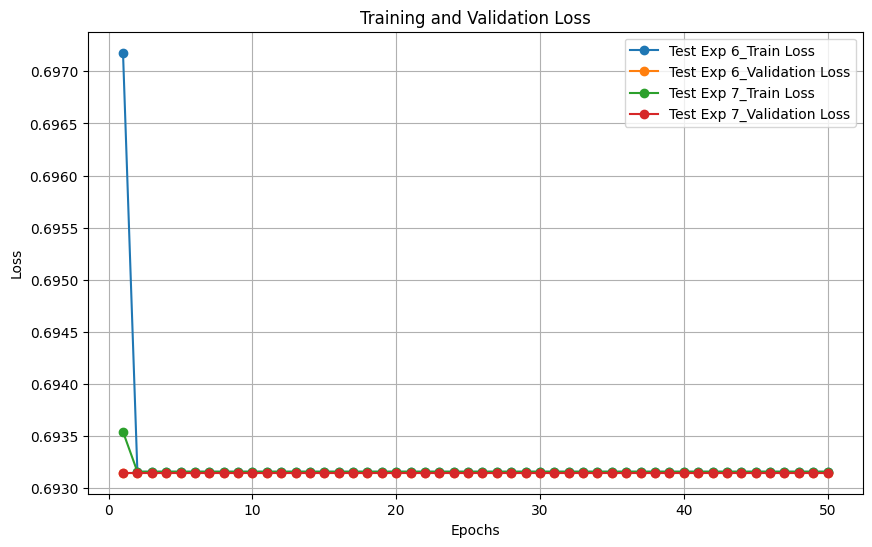

In [35]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 51))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    plt.plot(epochs, loss_data[exps]['train'], label=exps + '_Train Loss', marker='o')
    plt.plot(epochs, loss_data[exps]['val'], label=exps + '_Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps]['train'], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps]['val'], mode='lines+markers', name=exps + '_Validation Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

In [37]:
accuracy_data = {}
for exps in data.keys():
    # train_loss = []
    # val_loss = []
    # for i in data[exps]["history"]['train']["loss"]:
    #     val = i.cpu().item()
    #     train_loss.append(val)
    # for i in data[exps]["history"]['val']["loss"]:
    #     val = i.cpu().item()
    #     # print(val)
    #     val_loss.append(val)
    accuracy_data[exps] = {}
    accuracy_data[exps]['train'] = data[exps]["history"]['train']['ExactMatchAccuracy']
    accuracy_data[exps]['val'] = data[exps]["history"]['val']['ExactMatchAccuracy']

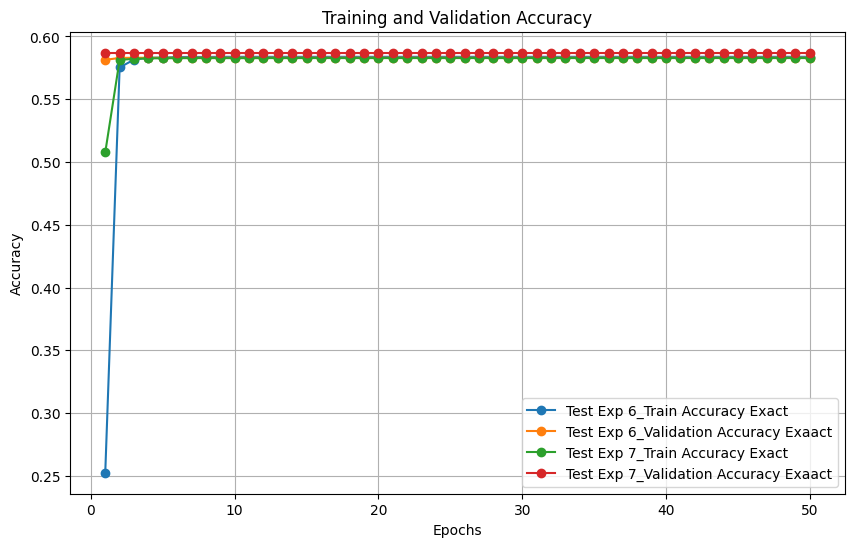

In [38]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, 51))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
    plt.plot(epochs, data[exps]["history"]['train']['ExactMatchAccuracy'], label=exps + '_Train Accuracy Exact', marker='o')
    plt.plot(epochs, data[exps]["history"]['val']['ExactMatchAccuracy'], label=exps + '_Validation Accuracy Exaact', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
auroc_data = {}
for exps in data.keys():
    auroc_data[exps] = {}
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/14)
    auroc_data[exps]['train'] = avg_auroc
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/14)
    auroc_data[exps]['val'] = avg_auroc

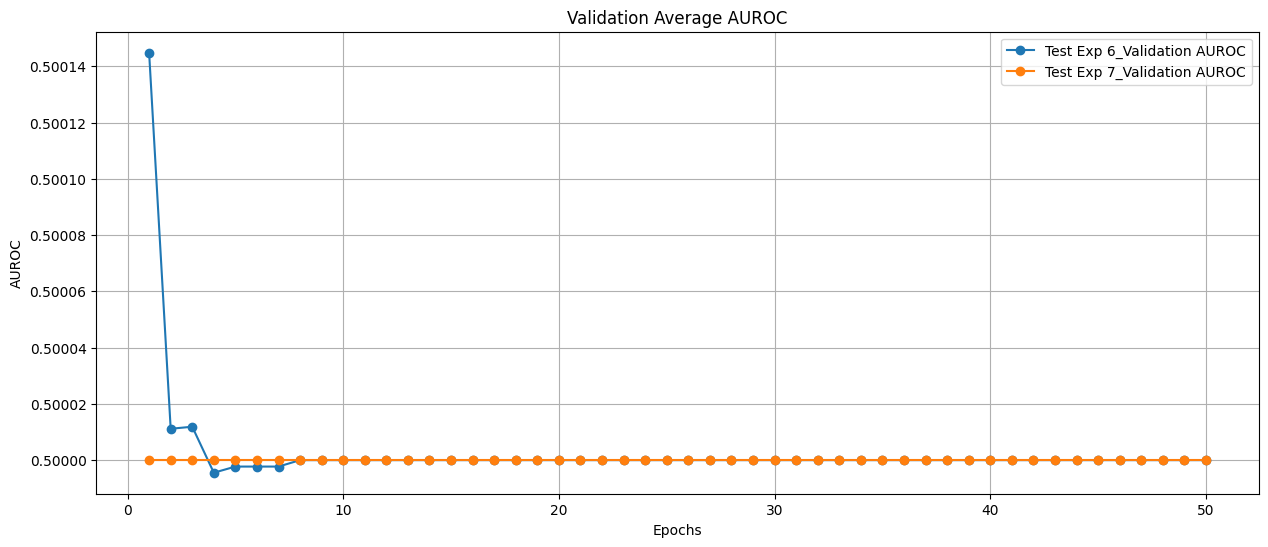

In [40]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, 51))
for exps in auroc_data.keys():
    plt.plot(epochs, auroc_data[exps]['val'], label=exps + '_Validation AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Validation Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

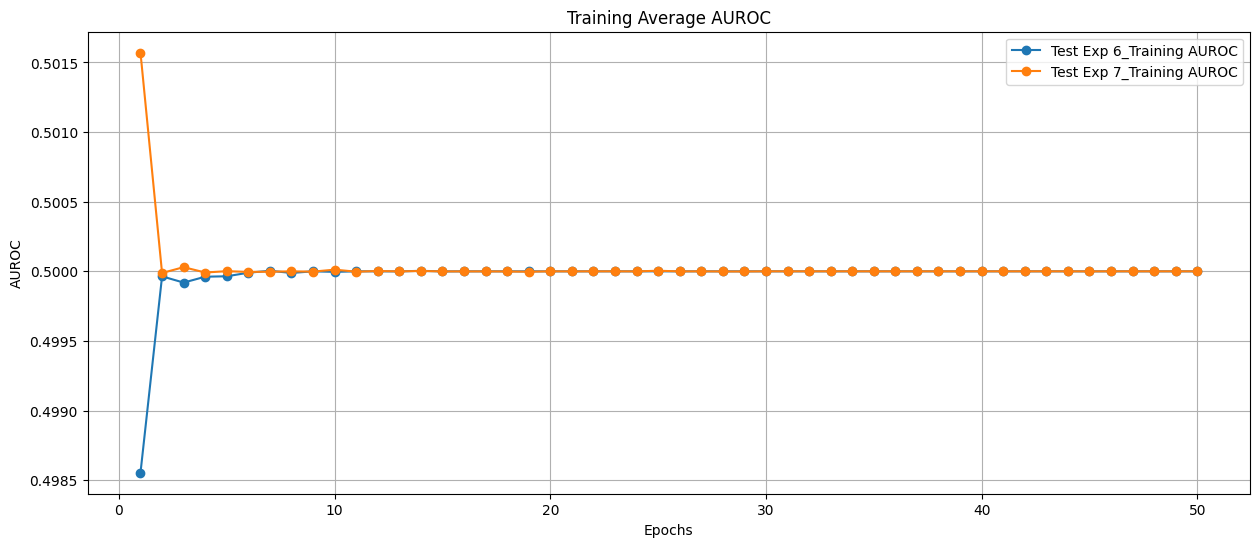

In [41]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, 51))
for exps in auroc_data.keys():
    plt.plot(epochs, auroc_data[exps]['train'], label=exps + '_Training AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Training Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
f1score_data = {}
for exps in data.keys():
    f1score_data[exps] = {}
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['F1Score']):
        avg_f1score.append(sum(score_list)/14)
    f1score_data[exps]['train'] = avg_f1score
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['F1Score']):
        avg_f1score.append(sum(score_list)/14)
    f1score_data[exps]['val'] = avg_f1score

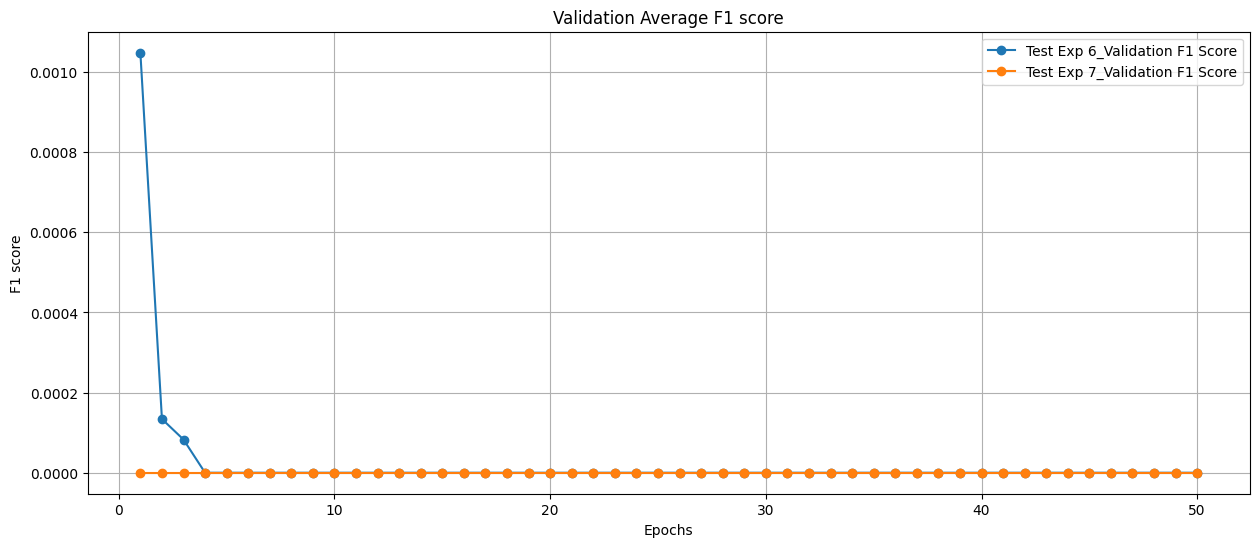

In [43]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, 51))
for exps in f1score_data.keys():
    plt.plot(epochs, f1score_data[exps]['val'], label=exps + '_Validation F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Validation Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

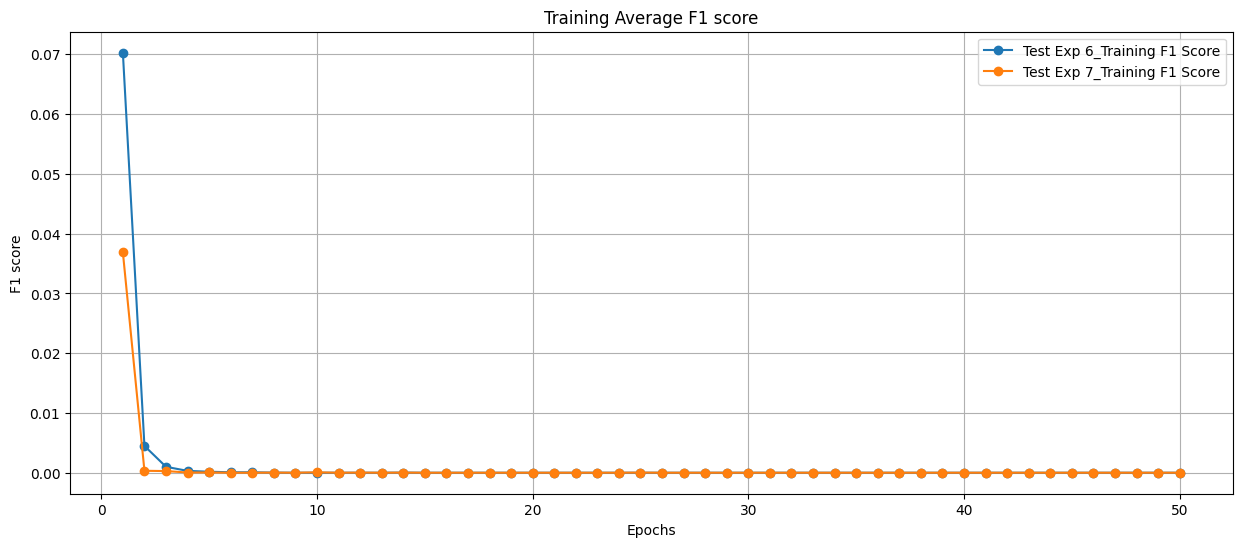

In [44]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, 51))
for exps in f1score_data.keys():
    plt.plot(epochs, f1score_data[exps]['train'], label=exps + '_Training F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Training Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
array = [0.14610162, 0.28070175, 0.41036356, 0.22634213, 0.07307172,
       0.03833145, 0.        , 0.12469287, 0.00753904, 0.08813559,
       0.02060086, 0.        , 0.02115541, 0.        ]
print(sum(array)/14)

0.10264542857142857


In [46]:
all_metrics = {}
all_metrics['epoch'] = 50
all_metrics['loss'] = loss_data
all_metrics['accuracy'] = accuracy_data
all_metrics['auroc'] = auroc_data
all_metrics['f1score'] = f1score_data

In [47]:
import json

with open("/home/karan/Documents/GitHub/BTP/data_convertor/exp_metrics.json", "w") as file:
    json.dump(all_metrics, file)